# Classification : Customer Churn Prediction

Akan dibangun model prediktif yang dapat mengklasifikasikan apakah seorang pelanggan akan melakukan churn (berhenti menggunakan layanan) atau tidak. Deteksi dini terhadap pelanggan yang berisiko churn sangat penting bagi perusahaan untuk menjaga loyalitas pelanggan dan merancang strategi retensi yang efektif. Akan digunakan model regresi logistik pada klasifikasi ini.

# Load Data

Import Library yang dibutuhkan

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

Load data

In [2]:
df_load = pd.read_csv("C:/Users/LENOVO/Python/dqlab_telco_final.csv")
print(df_load.shape)

(6950, 13)


Menampilkan data

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


Mengetahui jumlah pelanggan dari id unik

In [4]:
#Tampilkan jumlah ID yang unik
df_load.customerID.nunique()

6950

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) merupakan tahap awal dalam proses analisis data yang bertujuan untuk memahami isi, pola, dan karakteristik dari data yang digunakan. Proses ini mencakup analisis distribusi, frekuensi, korelasi, dan hubungan antar variabel.

Secara umum, EDA dapat dilakukan dalam tiga pendekatan:
* Analisis Univariat: Analisis deskriptif terhadap satu variabel, baik numerik maupun kategorikal. Misalnya melihat distribusi nilai, central tendency (mean, median), dan sebaran data.
* Analisis Bivariat: Analisis hubungan antara dua variabel, umumnya antara fitur dan target variabel (misalnya, antara lama berlangganan dan status churn).
* Analisis Multivariat: Analisis keterkaitan lebih dari dua variabel secara bersamaan untuk mengidentifikasi pola yang lebih kompleks.

Pada eksplorasi ini, analisis dilakukan secara terpisah untuk fitur numerik dan fitur kategorikal, dengan fokus khusus pada persebaran data antara pelanggan yang melakukan churn dan yang tidak (churn: yes dan churn: no).

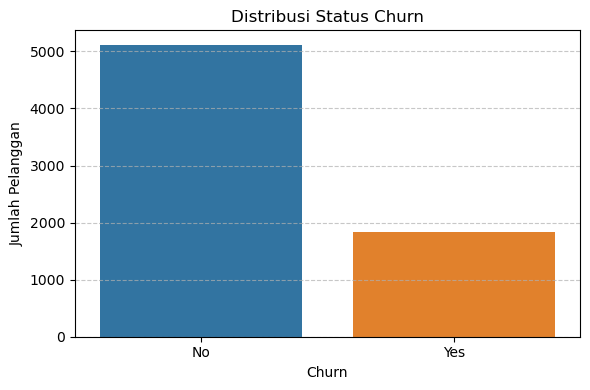

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_load, x='Churn', hue='Churn')
plt.title('Distribusi Status Churn')
plt.xlabel('Churn')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari hasil bar chart, terlihat bahwa mayoritas pelanggan tidak mengalami churn, dengan jumlah pelanggan Churn = No melebihi 5000, sedangkan Churn = Yes kurang dari 2000.

## Exploratory Data Analysis (EDA) Variabel Numerik
Pada tahap ini, kita akan fokus pada variabel-variabel numerik yang bersifat prediktor. Analisis dilakukan secara bivariat, yaitu dengan memvisualisasikan hubungan antara masing-masing variabel numerik terhadap variabel target (churn).

Kita akan menggunakan dataset df_load dan fungsi subplots() untuk menampilkan beberapa grafik dalam satu set tampilan agar analisis lebih terstruktur dan mudah dibandingkan.

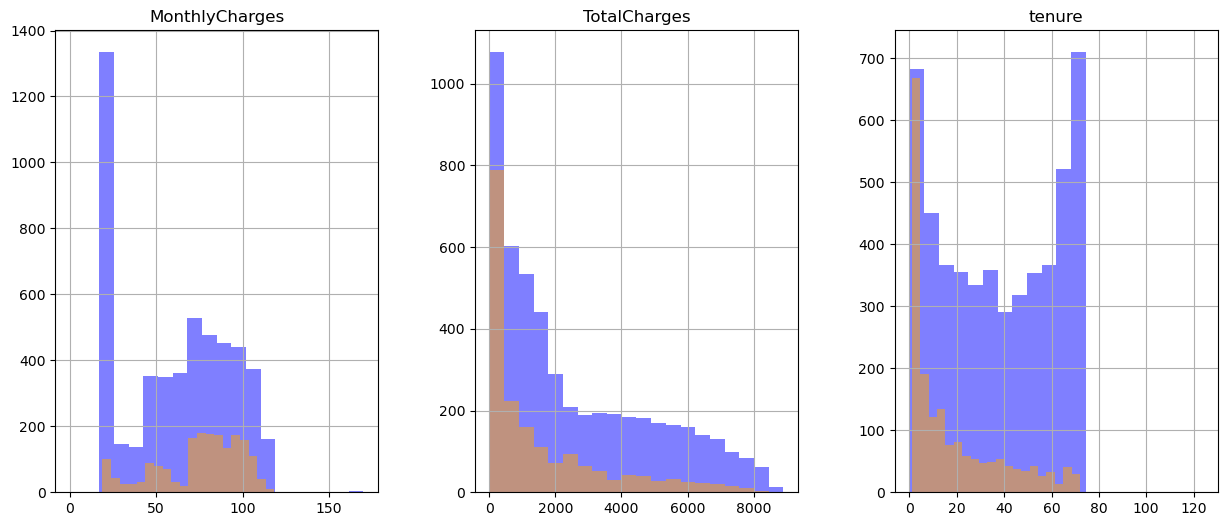

In [6]:
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Gunakan kode berikut untuk memplot dua lapisan histogram per setiap fitur numerik, gunakan warna biru dan oranye, masing-masing
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

Dari hasil di atas, dapat diinterpretasikan sebagai berikut:
1. MonthlyCharges
   * Pelanggan dengan churn Yes (oranye) cenderung lebih banyak pada level MonthlyCharges tinggi (sekitar 70 ke atas) dibanding pelanggan churn No (biru).
   * Sebaliknya, pada MonthlyCharges (sekitar 20-40), pelanggan yang tidak churn mendominasi.
   * Jadi, pelanggan dengan tagihan bulanan yang lebih mahal lebih berisiko churn.
3. TotalCharges
   * Sebagian besar pelanggan churn Yes memiliki TotalCharges rendah (di bawah 2000).
   * Pelanggan dengan TotalCharges tinggi (di atas 5000) sebagian besar tidak churn.
   * Jadi, pelanggan yang baru bergabung (TotalCharges rendah → masa langganan singkat) cenderung lebih rentan churn.
4. Tenure
   * Pelanggan churn Yes mendominasi di tenure rendah (kurang dari 20 bulan).
   * Sebaliknya, pelanggan dengan tenure panjang (di atas 60 bulan) hampir seluruhnya tidak churn.
   * Jadi, semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka churn.

## Exploratory Data Analysis (EDA) Variabel Kategorik
Selanjutnya, kita akan melakukan analisis terhadap variabel-variabel kategorik yang bersifat prediktor. Sama seperti sebelumnya, analisis dilakukan secara bivariat terhadap target churn, untuk melihat pola distribusi pada masing-masing kategori.

Visualisasi akan dibuat menggunakan fungsi countplot() dari Seaborn, untuk menampilkan jumlah pengamatan (count) pada setiap kategori, dibedakan berdasarkan status churn.

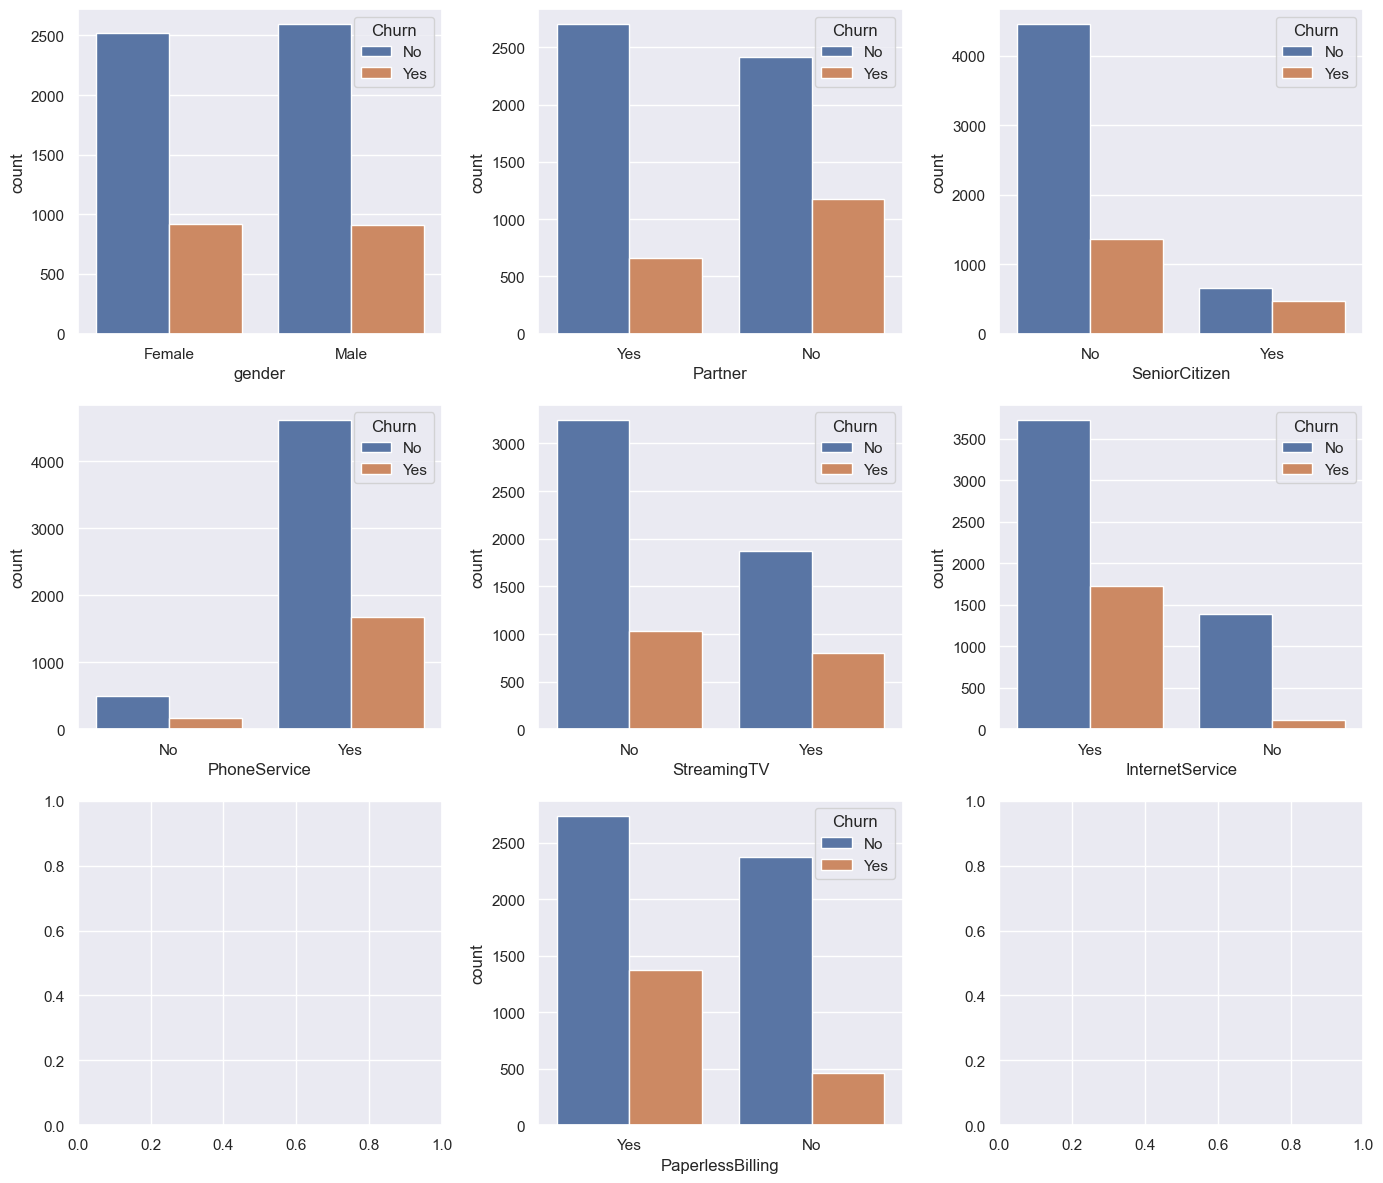

In [7]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Berikut beberapa analisa hasil EDA variabel kategorik:
1. Gender
   * Tidak ada perbedaan mencolok antara pria dan wanita: churn terjadi hampir seimbang di kedua gender.
   * Jadi, gender bukan faktor signifikan untuk churn.
2. Partner
   * Pelanggan tanpa pasangan (Partner=No) lebih banyak churn dibanding yang punya pasangan.
   * Jadi, memiliki pasangan tampaknya meningkatkan loyalitas pelanggan.

3. SeniorCitizen
   * Senior (SeniorCitizen=Yes) lebih sering churn dibanding non-senior.
   * Jadi, pelanggan berusia lebih tua cenderung lebih rentan churn.
4. PhoneService
   * Mayoritas pelanggan memiliki layanan telepon, dan churn lebih banyak terjadi di kelompok ini.
   * Namun, karena distribusi yang timpang (mayoritas memang punya PhoneService), informasi ini perlu dikaitkan dengan proporsi churn dibanding total pelanggan di masing-masing kategori.
5. StreamingTV
   * Pelanggan tanpa layanan StreamingTV churn lebih banyak daripada yang punya.
   * Jadi, fitur hiburan seperti streaming bisa membantu menurunkan churn.
6. InternetService
   * Pelanggan dengan InternetService=Yes churn lebih banyak.
   * Jadi, akses internet membawa risiko churn lebih tinggi, mungkin karena lebih banyak opsi provider/kompetitor.
7. PaperlessBilling
   * Pelanggan dengan PaperlessBilling=Yes memiliki churn lebih tinggi.
   * Jadi, pengguna e-billing mungkin lebih melek teknologi → lebih mudah membandingkan dan berpindah provider.

# Preprocessing Data

## Menghapus Kolom yang Tidak Diperlukan dari data

In [8]:
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


Mengonversi kolom non-numerik menjadi kolom numerik

In [9]:
for column in cleaned_df.columns:
    if np.issubdtype(cleaned_df[column].dtype, np.number):
        continue
    # Lakukan pengkodean untuk setiap kolom non-numerik
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())


            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.423165      0.903741   
std       0.500017       0.368754     0.499757    24.581073      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000   124.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [10]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0
2,1,0,0,5,1,1,1,0,104.10,541.90,1
3,0,0,1,72,1,1,1,1,115.50,8312.75,0
4,0,0,1,56,1,1,1,0,81.25,4620.40,0


# Split Dataset

Gunakan dataset hasil pembersihan sebelumnya (cleaned_df) untuk membagi data menjadi dua bagian: 70% untuk pelatihan (training) dan 30% untuk pengujian (testing), berdasarkan variabel prediktor (X) dan target (Y). Gunakan fungsi train_test_split() dari sklearn.model_selection untuk melakukan pembagian data ini.

Setelah data terbagi, lakukan value_counts() pada target di data latih dan data uji untuk memastikan distribusi kelas (proporsi churn) tetap seimbang (stratifikasi). Simpan hasil pembagian ke dalam variabel X_train, X_test, y_train, dan y_test.

In [11]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Persentase Churn di data Training adalah:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Persentase Churn di data Testing adalah:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


# Pembangunan Model dan Prediksi

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
log_model = LogisticRegression(max_iter=500).fit(x_train_scaled,y_train)
log_model

LogisticRegression(max_iter=500)

Melakukan prediksi training dan testing

In [17]:
y_train_pred = log_model.predict(x_train_scaled)
y_test_pred = log_model.predict(x_test_scaled)

# Evaluasi Hasil

Menampilkan classification report

In [18]:
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.66      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.75      0.70      0.72      4865
weighted avg       0.79      0.80      0.79      4865



## Hasil Training Model
1. Kelas 0 (Tidak Churn)
   * Precision 0.83 → dari semua prediksi “tidak churn”, 83% benar.
   * Recall 0.91 → dari semua pelanggan yang benar-benar tidak churn, 91% berhasil dikenali.
   * F1-score 0.87 → harmonisasi precision dan recall yang cukup baik.
2. Kelas 1 (Churn)
   * Precision 0.66 → dari semua prediksi “churn”, hanya 66% yang benar-benar churn.
   * Recall 0.49 → dari semua pelanggan yang benar-benar churn, hanya 49% yang terdeteksi model.
   * F1-score 0.56 → cukup rendah, menunjukkan kesulitan mendeteksi churn.
3. Accuracy keseluruhan training: 0.80 → model mengenali dengan tepat 80% pelanggan di data training.
4. Macro average: F1-score 0.72 → rata-rata performa antar kelas dengan bobot yang sama (terlihat kelas 1 masih lemah).

In [19]:
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.63      0.47      0.54       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.70      2085
weighted avg       0.78      0.79      0.78      2085



## Hasil Testing Model
1. Kelas 0 (Tidak Churn)
   * Precision 0.83, Recall 0.90, F1-score 0.86 → konsisten dengan training, performa pada pelanggan yang tidak churn stabil.
2. Kelas 1 (Churn)
   * Precision 0.63 → masih di bawah 70%, menunjukkan model sering keliru memprediksi churn.
   * Recall 0.47 → hanya 47% pelanggan churn yang terdeteksi, risiko besar bagi bisnis.
   * F1-score 0.54 → tetap rendah seperti pada training.
3. Accuracy keseluruhan testing: 0.79 → sedikit lebih rendah dari training, namun menunjukkan generalisasi model relatif stabil.
4. Macro average: F1-score 0.70 → rata-rata performa antar kelas dengan bobot yang sama (terlihat kelas 1 masih lemah).

# Kesimpulan
* Model logistic regression ini mampu mendeteksi pelanggan yang tidak churn dengan baik (precision & recall di atas 80%).

* Namun, model masih kurang baik dalam mendeteksi pelanggan yang churn, terlihat dari recall kelas churn di bawah 50%. Ini berarti banyak pelanggan churn yang luput dari prediksi → berpotensi merugikan bisnis.

* Akurasi di testing (79%) cukup baik dan tidak jauh dari training, sehingga model tidak overfitting.